# Hybrid Model using Random Forest, K-Nearest Neighbors and Artificial Neural Network(ANN) in Credit Card Fraud Detection System

# 1. Data Exploration

**1.1 Loading the dataset**

In [30]:
import pandas as pd
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

**1.2 How the dataset looks like**

In [31]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**1.3 Size of the dataset**

In [32]:
print(f"Dataset shape:- {data.shape}")

Dataset shape:- (284807, 31)


**1.4 Describing the dataset**

In [33]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**1.5 Checking any null values**

In [35]:
data.isna().values.any()

False

**1.6 List of feature names**

In [36]:
print(f"Columns or data features:- {data.columns}")

Columns or data features:- Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


**1.7 Plot histogram of each parameter**

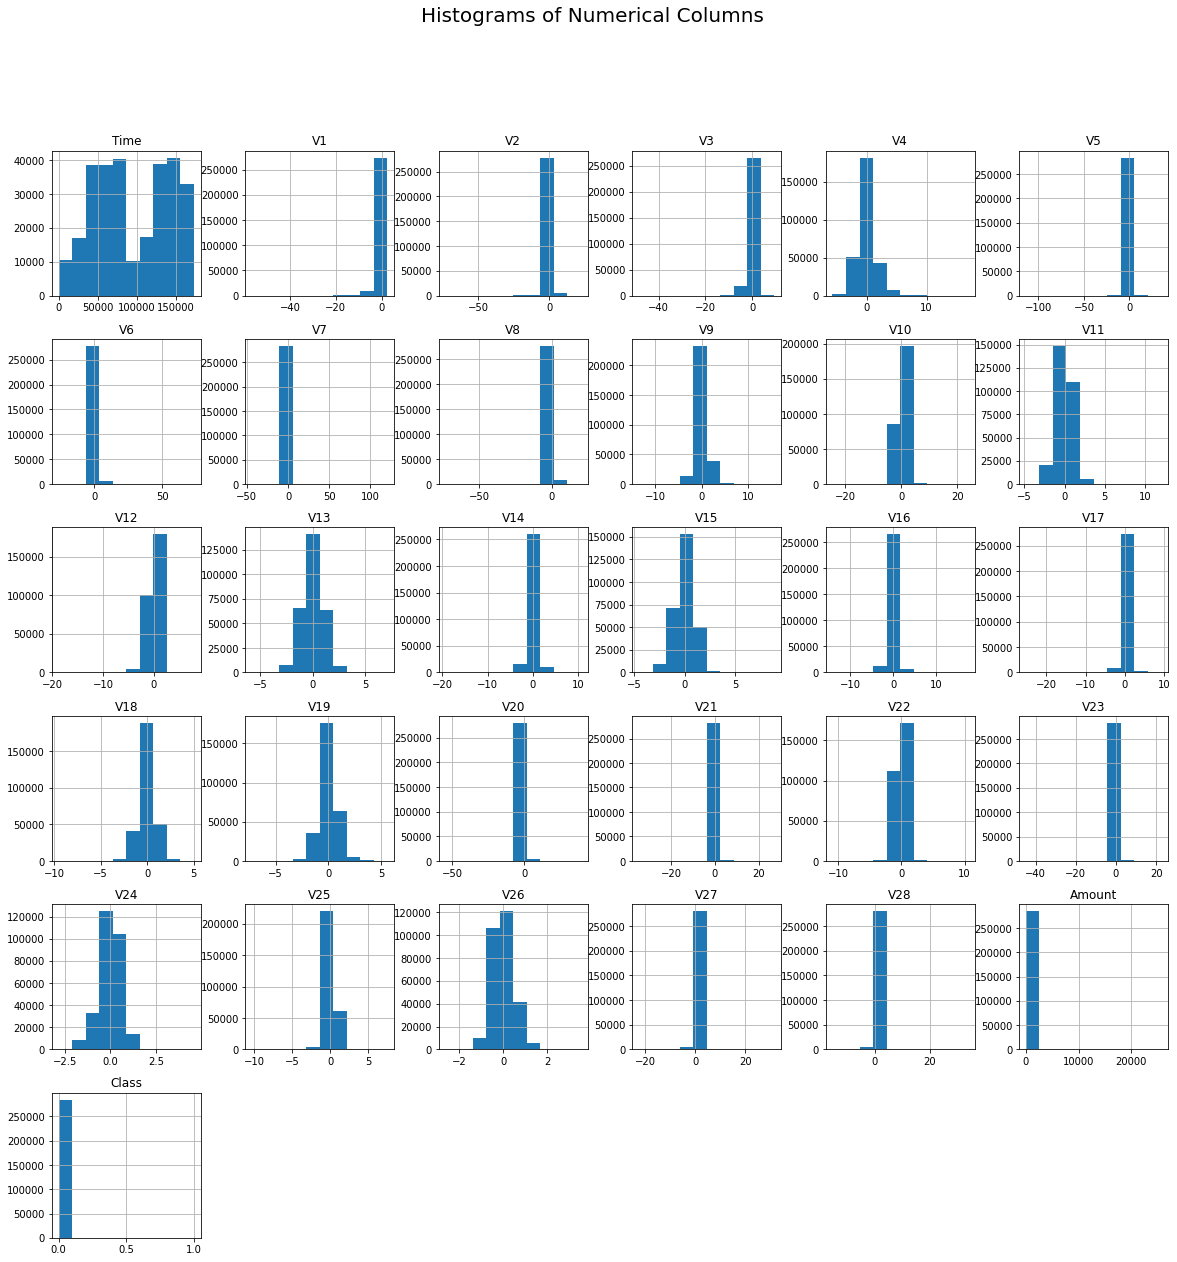

In [37]:
import matplotlib.pyplot as plt

data.hist(figsize= (20,20))
plt.suptitle("Histograms of Numerical Columns", fontsize = 20)
plt.show()

* We can observe a large prevalence of Class 0 (Non fraudulent).

**1.8 Seperating fraud and normal data**

In [38]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]
print('Fraud Cases: {}'.format(len(fraud)))
print('Normal Transactions: {}'.format(len(normal)))

Fraud Cases: 492
Normal Transactions: 284315


**1.9 Number of samples under each target value**

In [39]:
print(f"Shape of normal dataset:-{normal.shape}",'\n'f"Shape of fraud dataset:- {fraud.shape}")

Shape of normal dataset:-(284315, 31) 
Shape of fraud dataset:- (492, 31)


**1.10 Print the amount details of fraudulent transaction**

In [40]:
print('Amount details of fraudulent transaction :-')
fraud.Amount.describe()

Amount details of fraudulent transaction :-


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

**1.11 Print the amount details of legitimate transaction**

In [41]:
print('Amount details of Normal transaction :-')
normal.Amount.describe()

Amount details of Normal transaction :-


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

**1.12 Visualizing both dataset(Normal & fraud)**

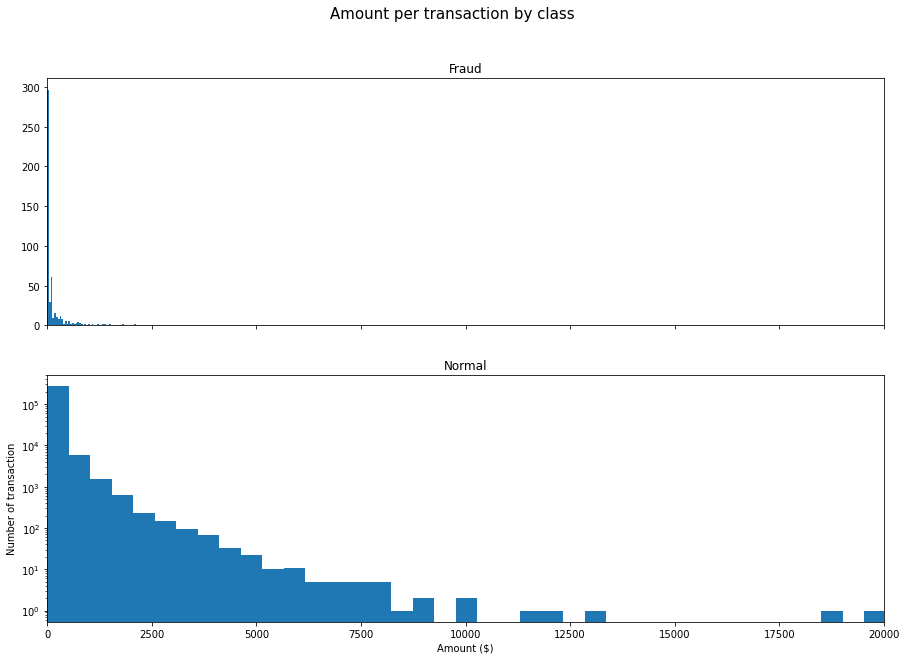

In [42]:
f, (ax1,ax2) = plt.subplots(2,1,figsize = (15,10),sharex= True)
f.suptitle("Amount per transaction by class", fontsize = 15)
bins = 50 
ax1.hist(fraud.Amount, bins= bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel("Amount ($)")
plt.ylabel("Number of transaction")
plt.xlim(0,20000)
plt.yscale('log')
plt.show()

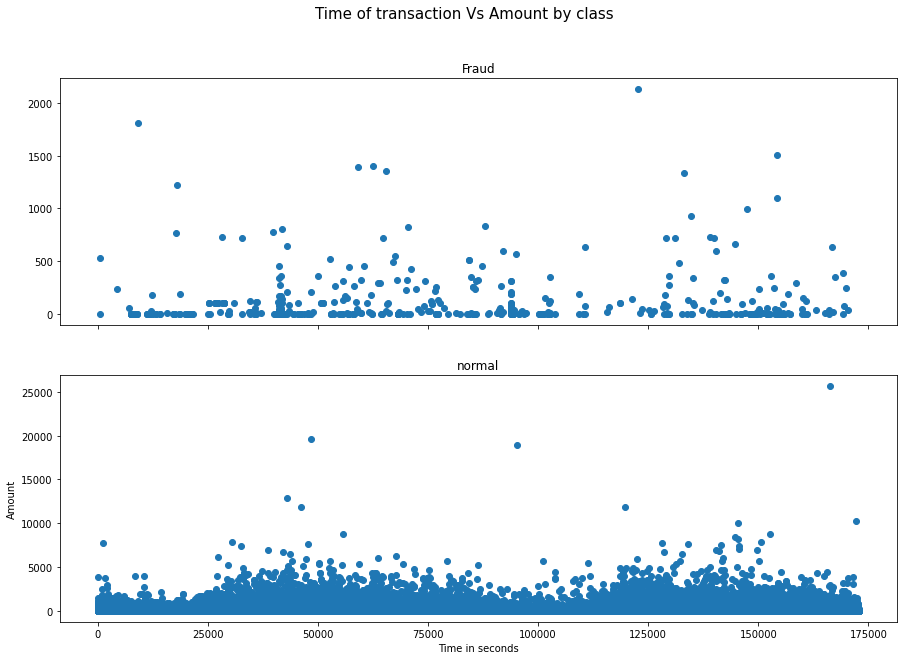

In [43]:
# Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f,(ax1,ax2) = plt.subplots(2,1, figsize=(15,10),sharex = True)
f.suptitle('Time of transaction Vs Amount by class',fontsize = 15)
ax1.scatter(fraud.Time,fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time,normal.Amount)
ax2.set_title('normal')
plt.xlabel('Time in seconds')
plt.ylabel('Amount')
plt.show()

**1.13 Correlation matrix**

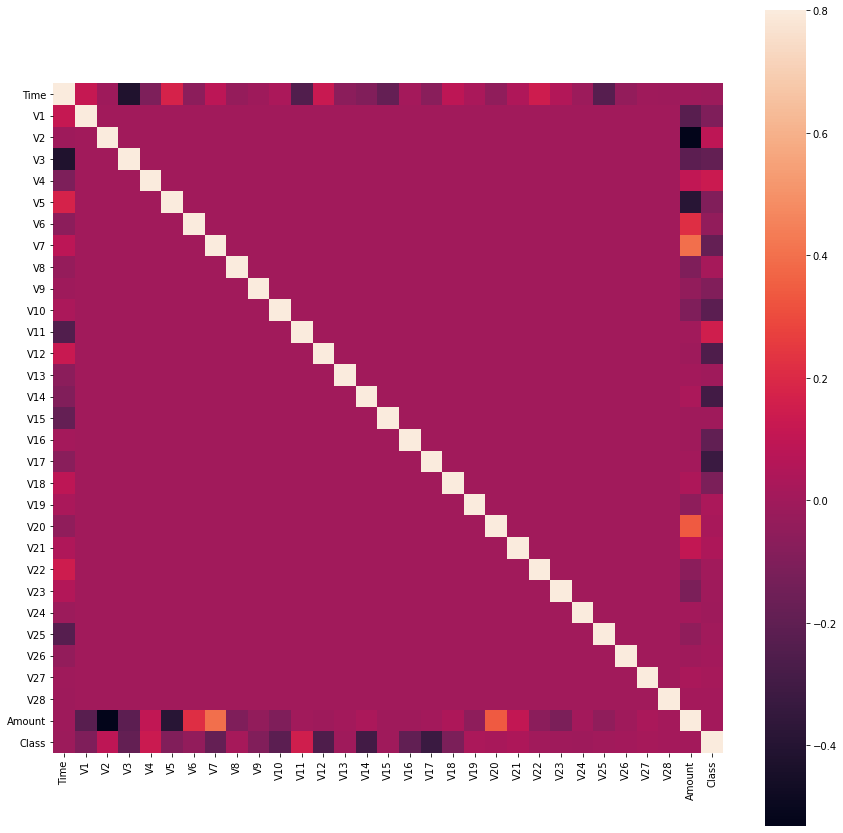

In [44]:
# Correlation 
import seaborn as sns 

corrmat = data.corr()
fig = plt.figure(figsize = (15,15))
sns.heatmap(corrmat, vmax = 0.8, square =True)
plt.show()

# 2 Data Preprocessing

**2.1 Removing irrelevant features/columns**

In [45]:
data = data.drop(['Time'], axis = 1)
print(f'List of columns name after removing Time column:- \n{data.columns}')

List of columns name after removing Time column:- 
Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')


# 3. Data transformation

In [46]:
from sklearn.preprocessing import StandardScaler

data['normalized_Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'], axis = 1)
print(f"few values of Amount column after applying StandardScalar:- \n{data['normalized_Amount'][0:4]}")

few values of Amount column after applying StandardScalar:- 
0    0.244964
1   -0.342475
2    1.160686
3    0.140534
Name: normalized_Amount, dtype: float64


# 4. Splitting the dataset

In [47]:
from sklearn.model_selection import train_test_split

X = data.iloc[:,data.columns != 'Class']
y = data.iloc[:,data.columns == 'Class']
X_train , X_test, y_train , y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(199364, 29)
(85443, 29)
(199364, 1)
(85443, 1)


# 5. Random Forest Classifer

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score



Model training start..


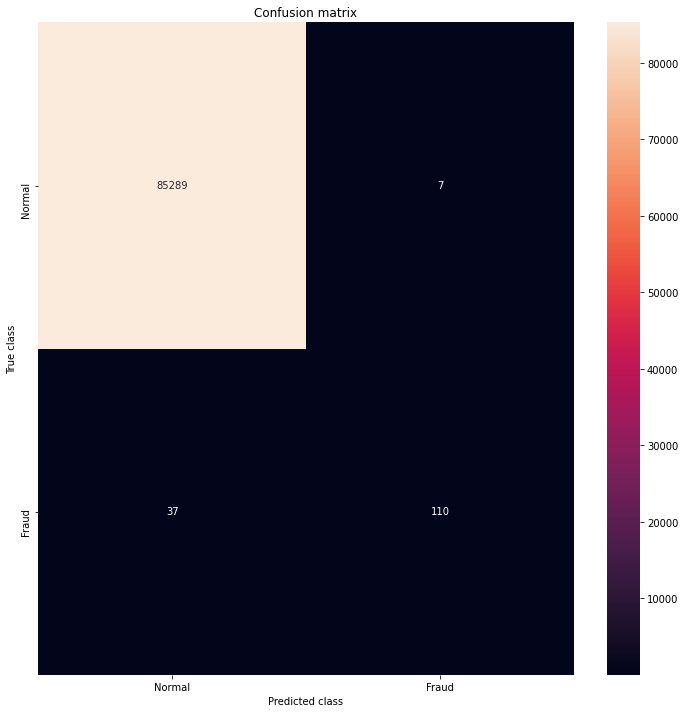

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.94      0.75      0.83       147

    accuracy                           1.00     85443
   macro avg       0.97      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy score :- 0.9994850368081645


In [49]:
# initialize object for randomforestClassifer class
random_forest = RandomForestClassifier(n_estimators=10, criterion= 'entropy', random_state=0)
print('Model training start..')
random_forest.fit(X_train,y_train.values.ravel())


# predict the result using test data
y_pred1 = random_forest.predict(X_test)


#Confusion matrix 
lables = ['Normal','Fraud']
conf_matrix = confusion_matrix(y_test,y_pred1)
plt.figure(figsize = (12,12))
sns.heatmap(conf_matrix, xticklabels= lables, yticklabels= lables, annot= True,fmt= 'd')
plt.title('Confusion matrix')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

# Classification report for f1-score
print(f"Classification report:- \n {classification_report(y_test,y_pred1)}")

# Accuracy score
print(f"Accuracy score :- {accuracy_score(y_test, y_pred1)}")

# 6. KNN

Model training start..


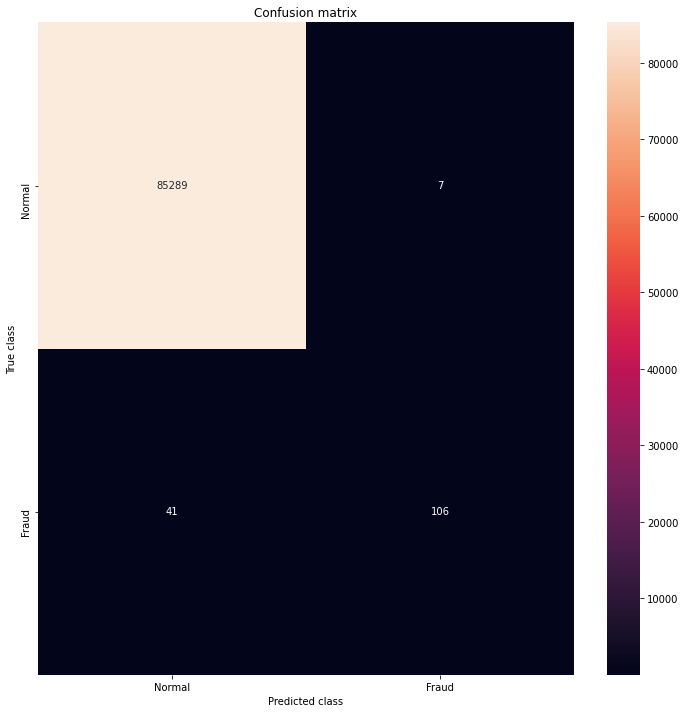

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.94      0.72      0.82       147

    accuracy                           1.00     85443
   macro avg       0.97      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy score :- 0.9994382219725431


In [50]:
from sklearn.neighbors import KNeighborsClassifier

# initialize object for KNeighborsClassifer 
knn_classifer = KNeighborsClassifier(n_neighbors= 5, metric = 'minkowski', p = 2)
print('Model training start..')
knn_classifer.fit(X_train,y_train.values.ravel())

# Predict result using test dataset
y_pred2 = knn_classifer.predict(X_test)


# Confusion matrix 
lables = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test,y_pred2)
plt.figure(figsize = (12,12))
sns.heatmap(conf_matrix, xticklabels= lables, yticklabels = lables, annot = True, fmt = 'd')
plt.title("Confusion matrix")
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.show()

# Classification report for f1-score
print(f"Classification report:- \n {classification_report(y_test,y_pred2)}")

# Accuracy score
print(f"Accuracy score :- {accuracy_score(y_test, y_pred2)}")

# 7. ANN

In [51]:
import tensorflow as tf 

# Adding a layers in ANN

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(input_dim = 29, units = 29, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 29, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
print('Model training start...')
ann.fit(X_train,y_train,batch_size = 15, epochs = 5)

Model training start...
Epoch 1/5
13291/13291 [==============================] - 17s 1ms/step - loss: 0.0201 - accuracy: 0.9952
Epoch 2/5
13291/13291 [==============================] - 17s 1ms/step - loss: 0.0029 - accuracy: 0.9995
Epoch 3/5
13291/13291 [==============================] - 17s 1ms/step - loss: 0.0026 - accuracy: 0.9995
Epoch 4/5
13291/13291 [==============================] - 16s 1ms/step - loss: 0.0022 - accuracy: 0.9995
Epoch 5/5
13291/13291 [==============================] - 17s 1ms/step - loss: 0.0027 - accuracy: 0.9993


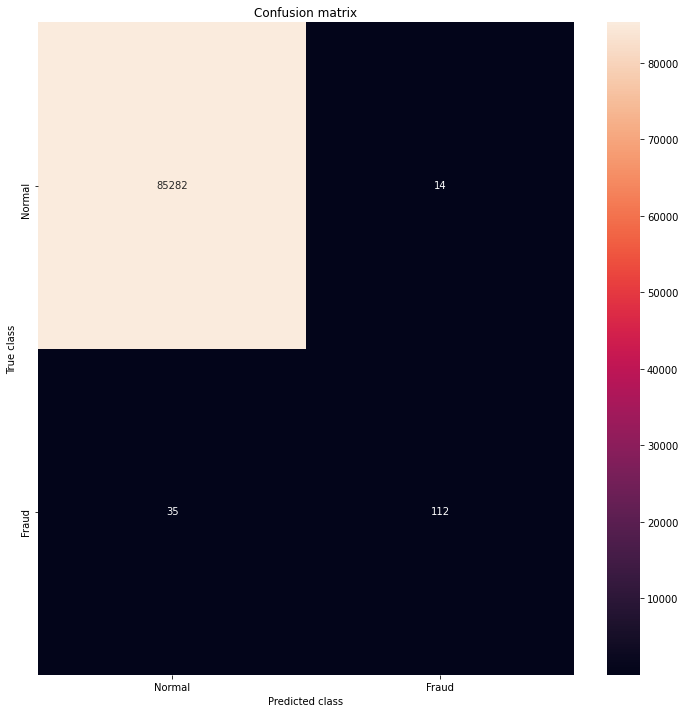

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.89      0.76      0.82       147

    accuracy                           1.00     85443
   macro avg       0.94      0.88      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy score :- 0.9994265182636377


In [52]:
# Predict result using dataset

y_pred3 = ann.predict(X_test)
y_pred3 = (y_pred3 >= 0.5)

# Confusion matrix 

Lables = ['Normal','Fraud']
Conf_mat = confusion_matrix(y_test, y_pred3)
plt.figure(figsize =  (12,12))
sns.heatmap(Conf_mat , xticklabels= Lables, yticklabels= Lables, annot = True, fmt = 'd')
plt.title('Confusion matrix')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

# Classification report for f1-score 
print(f'Classification report:- \n {classification_report(y_test,y_pred3)}')

# Accuracy score 
print(f"Accuracy score :- {accuracy_score(y_test, y_pred3)}")

# 8. Majority Voting

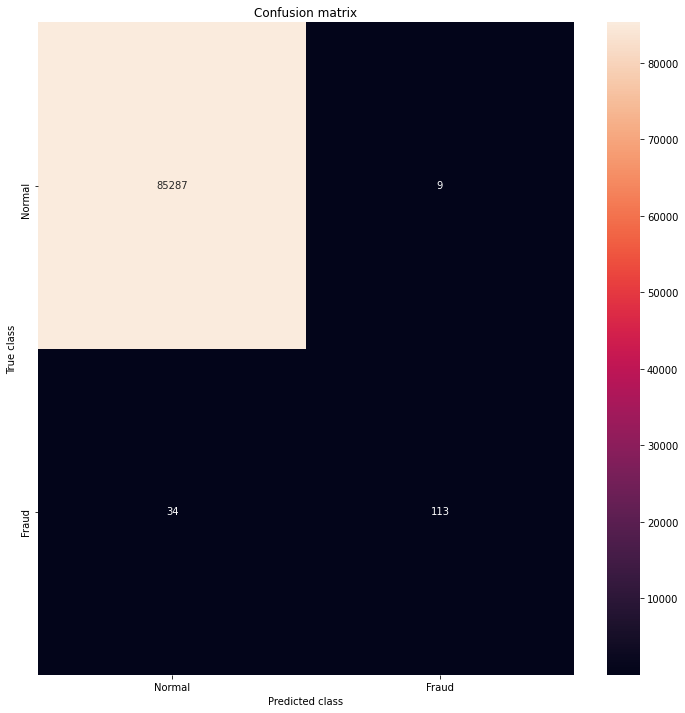

Classification report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.93      0.77      0.84       147

    accuracy                           1.00     85443
   macro avg       0.96      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy score :- 0.9994967405170698


In [53]:
import numpy as np 

res = np.concatenate((y_pred1.reshape(len(y_pred1),1), y_pred2.reshape(len(y_pred2),1), y_pred3.reshape(len(y_pred3),1)),1)
lst = []
for i in range(len(res)):
    c1 = 0
    c2 = 0 
    for j in range(len(res[i])):
        if(res[i][j] == 1):
            c1 = c1 + 1
        else:
            c2 = c2 + 1 
    
    if (c1>c2):
        lst.append(1)
    else:
        lst.append(0)
        
        
# Confusion matrix 
Lables = ['Normal','Fraud']
Conf_mat = confusion_matrix(y_test, lst)
plt.figure(figsize = (12,12))
sns.heatmap(Conf_mat, xticklabels = Lables, yticklabels = Lables, annot = True, fmt = 'd')
plt.title('Confusion matrix')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

# Classification report for f1-score
print(f'Classification report:- \n {classification_report(y_test,lst)}')

# Accuracy score
print(f"Accuracy score :- {accuracy_score(y_test,lst)}")